In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [35]:
# Taken from: https://stackoverflow.com/questions/23142358/create-a-diverging-stacked-bar-chart-in-matplotlib
def survey(results, category_names, num_participants, plot_height=10):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*. The order is assumed
        to be from 'Strongly disagree' to 'Strongly aisagree'
    category_names : list of str
        The category labels.
    num_participants : int
        Number of participants
    line_height : int
        Height of line; default is 10
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1]//2
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index]/2

    # Color Mapping
    category_colors = plt.get_cmap('coolwarm_r')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, plot_height))

    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='black', alpha=.25)

    # X Axis
    ax.set_xlim(-num_participants, num_participants)
    ax.set_xticks(np.arange(-num_participants, num_participants+1, 10))
    ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x))))

    # Y Axis
    ax.invert_yaxis()

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Ledgend
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    # Set Background Color
    fig.set_facecolor('#FFFFFF')

    return fig, ax

In [33]:
ratings_excel = "ratings.xlsx"
ratings_df = pd.read_excel(os.path.join("./output", ratings_excel), index_col=0, sheet_name=None)

#count ratings and create a dict for usage in visualizations
ratings_counts = {}
for name, sheet in ratings_df.items():
    ratings = sheet[sheet.columns[1]]
    counts = ratings.value_counts(sort=False)
    print(counts)
    print(list(counts))
    # reindex to ensure also 0 ratings are within the counts
    counts = counts.reindex([1, 2, 3, 4, 5], fill_value=0)
    ratings_counts[ratings.name] = list(counts)

print(ratings_counts)

1     1
2     3
3    15
4    64
5    38
Name: Rate the AI skill "revise" for usefulness, dtype: int64
[1, 3, 15, 64, 38]
1     4
2     4
3    17
4    61
5    35
Name: Rate the AI skill "summarise" for usefulness, dtype: int64
[4, 4, 17, 61, 35]
1     1
2     5
3    13
4    50
5    52
Name: Rate the AI skill "format" for usefulness, dtype: int64
[1, 5, 13, 50, 52]
1     4
2     6
3    21
4    59
5    31
Name: Rate the AI skill "shorten" for usefulness, dtype: int64
[4, 6, 21, 59, 31]
1     3
2    10
3    25
4    57
5    26
Name: Rate the AI skill "extend" for usefulness, dtype: int64
[3, 10, 25, 57, 26]
1     2
2     8
3    29
4    56
5    26
Name: Rate the AI skill "highlight" for usefulness, dtype: int64
[2, 8, 29, 56, 26]
1     3
2     5
3    25
4    56
5    32
Name: Rate the AI skill "cut" for usefulness, dtype: int64
[3, 5, 25, 56, 32]
1     3
2     6
3    25
4    55
5    32
Name: Rate the AI skill "complete sentence" for usefulness, dtype: int64
[3, 6, 25, 55, 32]
1     5
2     7


In [13]:
frequency_excel = "frequency.xlsx"
frequency_df = pd.read_excel(os.path.join("./output", frequency_excel), index_col=0, sheet_name=None)

#count ratings and create a dict for usage in visualizations
frequency_counts = {}

for name, sheet in frequency_df.items():
    frequencies = sheet[sheet.columns[1]]
    counts = frequencies.value_counts(sort=False)
    # reindex to ensure also 0 ratings are within the counts
    counts = counts.reindex([1, 2, 3, 4, 5], fill_value=0)
    frequency_counts[frequencies.name] = list(counts)

print(frequency_counts)

How often do you work on text documents? [I work on text documents]
1     5
2     5
3    11
4    39
5    61
Name: How often do you work on text documents? [I work on text documents], dtype: int64
How often do you work professionally on text documents? [  I work professionally on text documents]
1    16
2    12
3    16
4    32
5    45
Name: How often do you work professionally on text documents? [  I work professionally on text documents], dtype: int64
I work on text documents on the following categories: [Factual texts (informative)]
1     4
2    12
3    12
4    36
5    57
Name: I work on text documents on the following categories: [Factual texts (informative)], dtype: int64
I work on text documents on the following categories: [Literary texts (creative)]
1    38
2    33
3    20
4    20
5    10
Name: I work on text documents on the following categories: [Literary texts (creative)], dtype: int64
I work on text documents on the following devices: [Smartphone]
1    32
2    34
3    17
4   

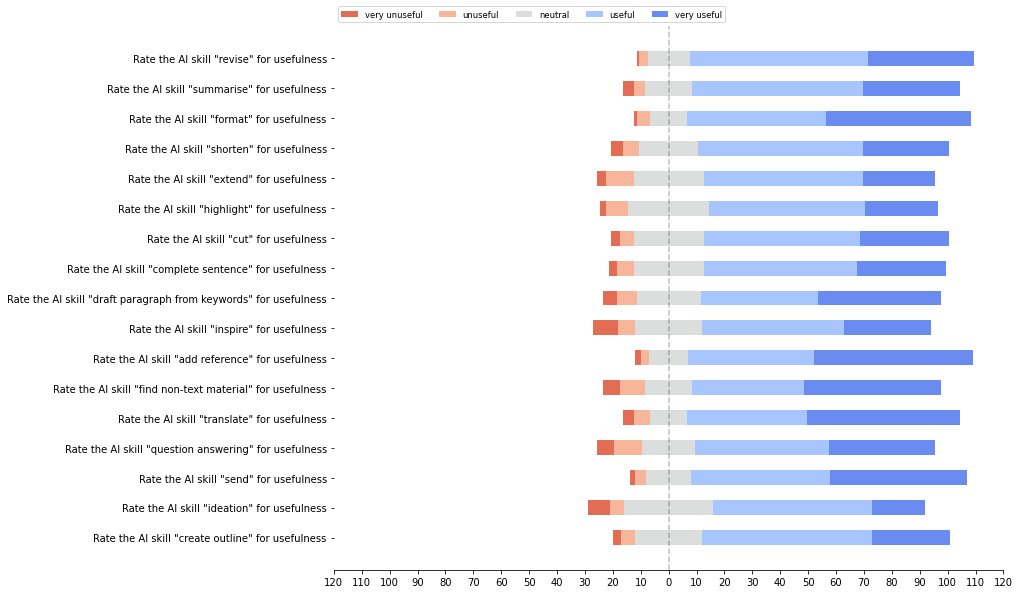

In [39]:
fig, ax = survey(ratings_counts, ["very unuseful", "unuseful", "neutral", "useful", "very useful"], 120)
plt.show()

In [64]:
# Taken from: https://stackoverflow.com/questions/23142358/create-a-diverging-stacked-bar-chart-in-matplotlib
def survey_shifted(results, category_names, num_participants, plot_height=10):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*. The order is assumed
        to be from 'Strongly disagree' to 'Strongly aisagree'
    category_names : list of str
        The category labels.
    num_participants : int
        Number of participants
    line_height : int
        Height of line; default is 10
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    offsets = data[:, 0] # shift bars by "never" ratings, i.e. data[0]

    print(offsets)
    # Color Mapping
    category_colors = plt.get_cmap('Blues')(
        np.linspace(0.15, 0.85, data.shape[1]))

    category_colors[0] = [0.9]
    print(category_colors)

    fig, ax = plt.subplots(figsize=(12, plot_height))

    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - data[:, 0]
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='black', alpha=.25)

    # X Axis
    ax.set_xlim(-num_participants, num_participants)
    ax.set_xticks(np.arange(-num_participants, num_participants+1, 10))
    ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x))))

    # Y Axis
    ax.invert_yaxis()

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Ledgend
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    # Set Background Color

    fig.set_facecolor('#FFFFFF')

    return fig, ax

[  5  16   4  38  32  72  12  39  81  22   8  90  20  32  35  98 115 112
  11  40  32  28  77  51  65  24  50  39  46  84  70  80]
[[0.9        0.9        0.9        0.9       ]
 [0.68173779 0.81856209 0.90409842 1.        ]
 [0.41708574 0.68063053 0.83823145 1.        ]
 [0.20756632 0.52129181 0.75006536 1.        ]
 [0.05021146 0.34176086 0.63060361 1.        ]]


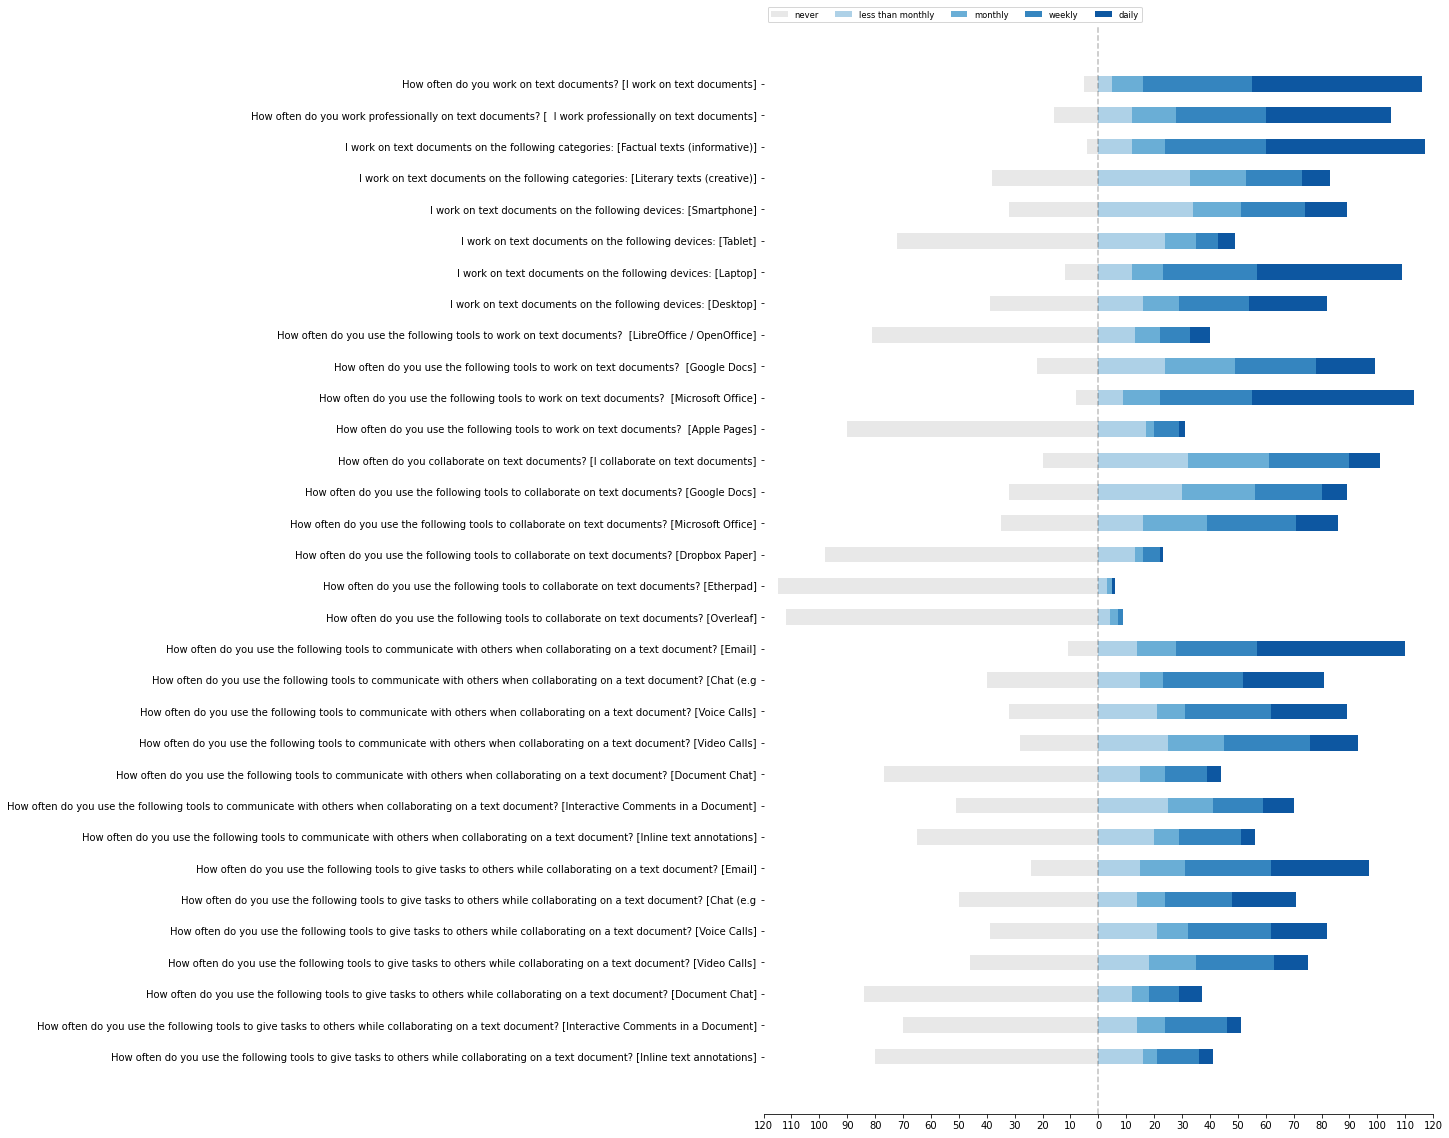

In [65]:
fig, ax = survey_shifted(frequency_counts, ["never", "less than monthly", "monthly", "weekly", "daily"], 120, 20)
plt.show()